- - - -
# Mechpy Tutorials
a mechanical engineering toolbox

source code - https://github.com/nagordon/mechpy  
documentation - https://nagordon.github.io/mechpy/ 

- - - -

Neal Gordon  
2017-02-20  

- - - -

A quick study to show the quasi-isotropic  properties of a lamina / laminate for quasi-isotropicity. In plan

Intution says that there should be a discernible "bump" in Ex as the "quasi" laminate is rotated, when in reality, it is identically ZERO. INTERESTING!

material properties are from Engineering Mechanics of Composite Materials, Daniel


In [5]:
from numpy import pi, zeros, ones, linspace, arange, array, sin, cos, sqrt, pi
from numpy.linalg import solve, inv
import matplotlib.pyplot as plt
from matplotlib.pyplot import plot,figure,xlim,ylim,title,legend, \
grid, show, xlabel,ylabel, tight_layout, savefig
import pandas as pd

In [6]:
%matplotlib inline

In [39]:
def T1(th):
    '''Stress Transform for Plane Stress
    th=ply angle in degrees
    voight notation for stress tranform. sigma1 = T1 @ sigmax
    recall T1(th)**-1 == T1(-th)'''
    n = sin(th*pi/180)
    m = cos(th*pi/180)
    T1 = array( [[m**2, n**2, 2*m*n],
                 [n**2, m**2,-2*m*n],
                 [-m*n, m*n,(m**2-n**2)]])
    return T1

def T2(th):
    '''Strain Transform for Plane Stress
    th=ply angle in degrees
    voight notation for strain transform. epsilon1 = T2 @ epsilonx'''
    n = sin(th*pi/180)
    m = cos(th*pi/180)
    T2 = array( [[m**2, n**2, m*n],
                 [n**2, m**2,-m*n],
                 [-2*m*n, 2*m*n,  (m**2-n**2)]])
    return T2

def Qf(E1,E2,nu12,G12):
    '''transversly isptropic compliance matrix. pg 58 herakovich
    G12 = E1/(2*(1+nu12))  if isotropic'''
    nu21 = E2*nu12/E1
    Q = array([[E1/(1-nu12*nu21),    E2*nu12/(1-nu12*nu21), 0],
               [ E2*nu12/(1-nu12*nu21), E2/(1-nu12*nu21),    0],
               [0,        0,       G12]])
    return Q

def plot_properties(layupname, Ex,Ey,nuxy,Gxy,H):
    plt.close('all')

    Q = Qf(Ex,Ey,nuxy,Gxy)

    plyangle = arange(-45, 45.1, 1)

    Exbar = zeros(len(plyangle))
    Eybar = zeros(len(plyangle))
    Gxybar = zeros(len(plyangle))

    Qbar = zeros((len(plyangle),3,3))
    for i,th in enumerate(plyangle):
        Qbar[i] = solve(T1(th), Q) @ T2(th)
    #Qbar = [solve(T1(th),Q) @ T2(th) for th in plyangle]

    Aij = Qbar*H

    # laminate Stiffness
    #     | Exbar    Eybar    Gxybar   |
    # A = | vxybar   vyxbar   etasxbar |
    #     | etaxsbar etaysbar etasybar |

    # laminate Comnpliance
    aij = zeros((len(plyangle),3,3))
    for i, _Aij in enumerate(Aij):
        aij[i] = inv(_Aij)

    # material properties for whole laminate (Daniel, pg183)
    Exbar  = [1/(H*_aij[0,0]) for _aij in aij] 
    Eybar  = [1/(H*_aij[1,1]) for _aij in aij] 
    Gxybar = [1/(H*_aij[2,2]) for _aij in aij] 

    df = pd.DataFrame({'plyangle':plyangle, 'Exbar':Exbar, 'Eybar':Eybar,'Gxybar':Gxybar})
    #print(df)
    #df.to_csv('Laminate Properties varying angle for E-Glass Epoxy fabric M10E-3783 {}.csv'.format(layupname))

    plt.figure(figsize=(12,8))
    plot(plyangle, Exbar, label = r"Modulus: $E_x$")
    plot(plyangle, Eybar, label = r"Modulus: $E_y$")
    plot(plyangle, Gxybar, label = r"Modulus: $G_{xy}$")
    title("Laminate Properties varying angle for E-Glass Unidirectional Tape {}".format(layupname))
    xlabel("$\Theta$")
    ylim([0,6.5e6])
    ylabel("modulus, psi")
    legend(loc='best')
    grid()

    #savefig('Laminate Properties varying angle for E-Glass Epoxy fabric M10E-3783 {}.png'.format(layupname))


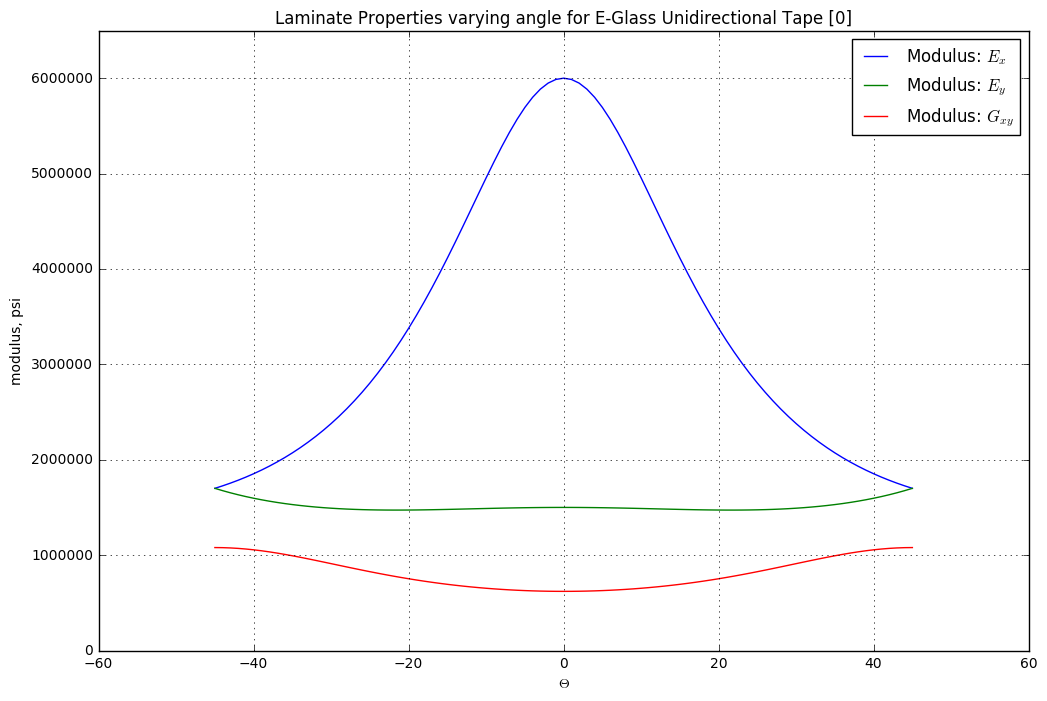

In [40]:
layupname = '[0]'
Ex=   6000000.00
Ey=   1500000.00
nuxy= 0.28
Gxy=  620000.00 
H=    0.1250

plot_properties(layupname, Ex,Ey,nuxy,Gxy,H)

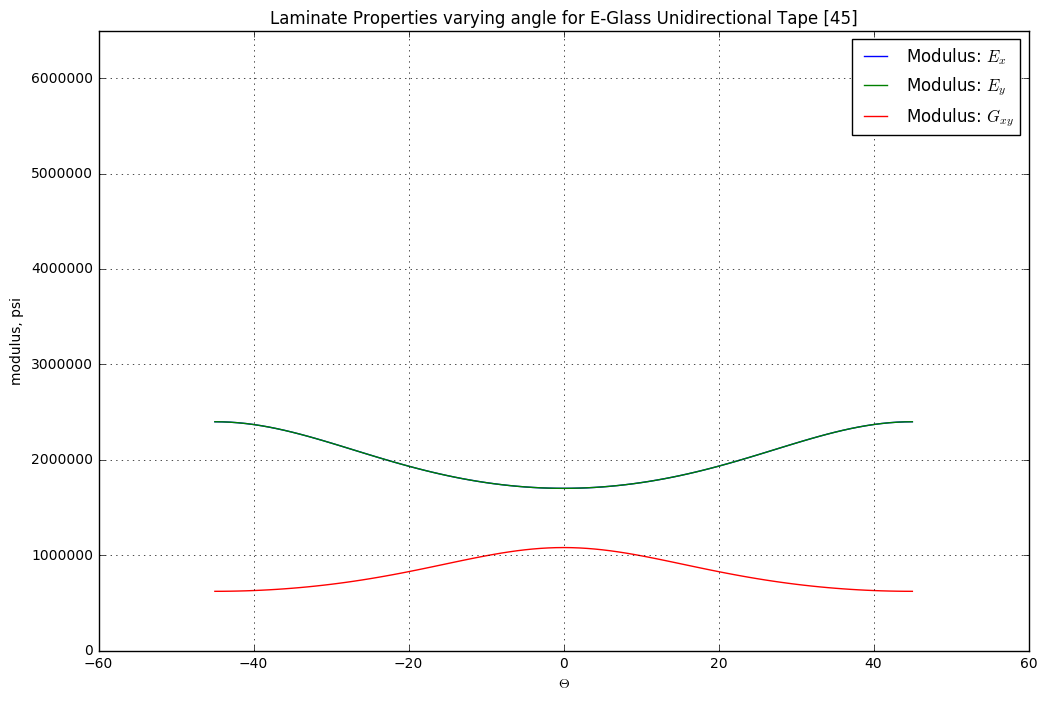

In [41]:
layupname = '[45]'
Ex=   1700027.42
Ey=   1700027.42
nuxy= 0.37
Gxy=  1079136.69   
H =   0.1250

plot_properties(layupname, Ex,Ey,nuxy,Gxy,H)

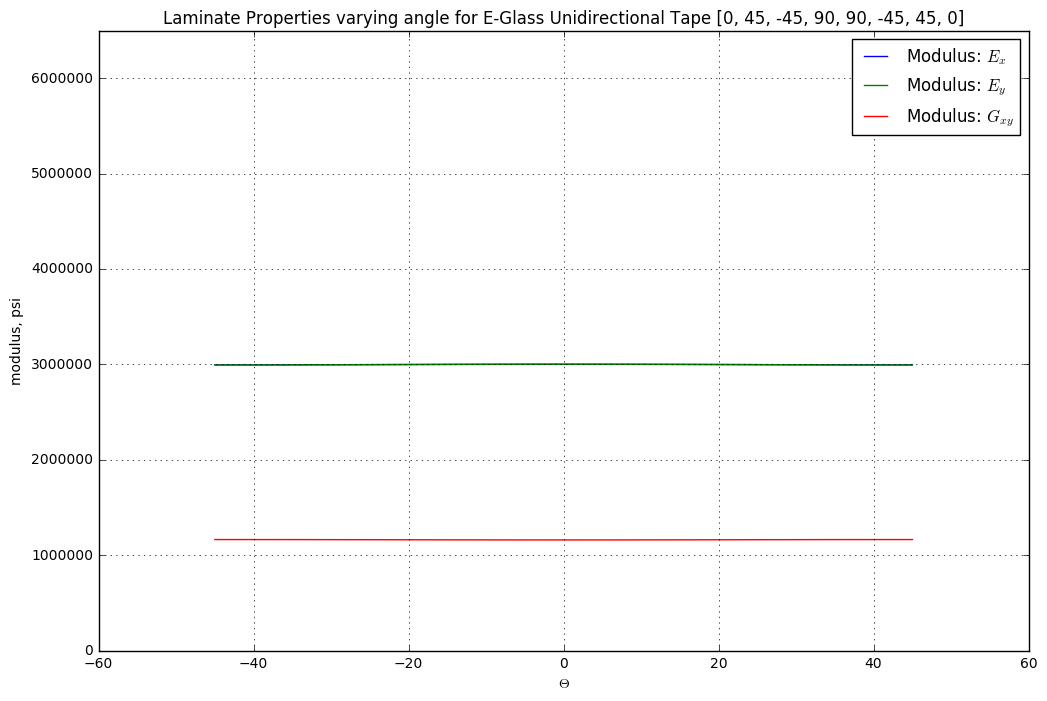

In [42]:
layupname = '[0, 45, -45, 90, 90, -45, 45, 0]'
Ex=   3000925.78
Ey=   3000925.78
nuxy= 0.29
Gxy=  1159143.21
H = 1.0000

plot_properties(layupname, Ex,Ey,nuxy,Gxy,H)

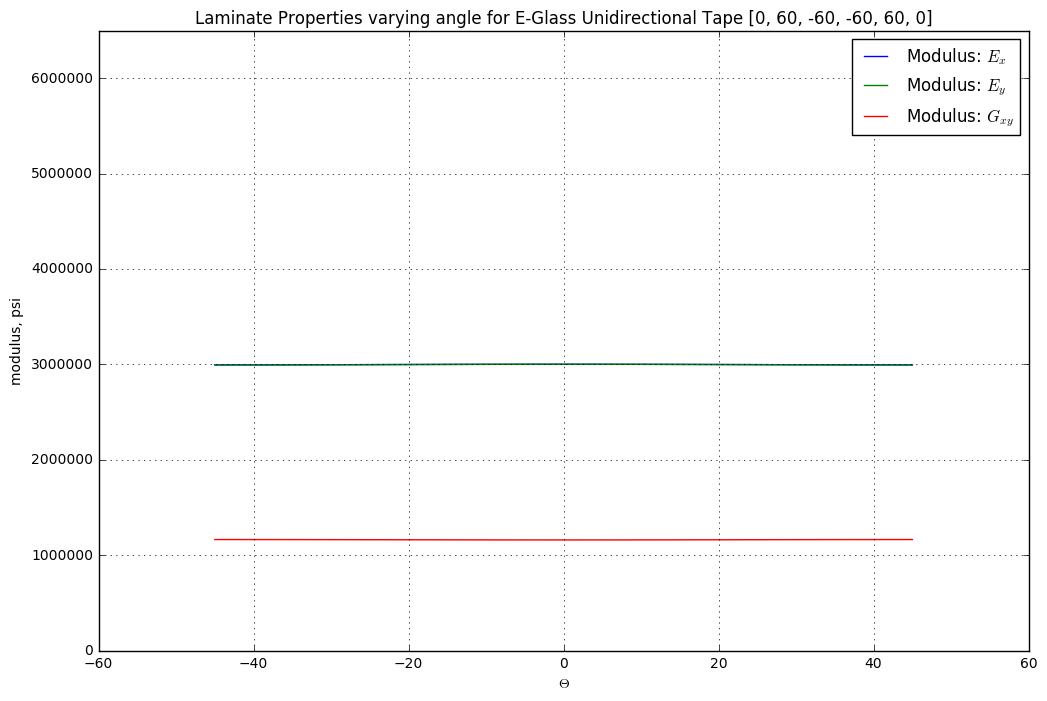

In [43]:
layupname = '[0, 60, -60, -60, 60, 0]'
Ex=   3000925.78
Ey=   3000925.78
nuxy= 0.29
Gxy=  1159143.21
H = 0.7500

plot_properties(layupname, Ex,Ey,nuxy,Gxy,H)